In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from atc_dict import atc_first_level_full_list, atc_second_level_full_list

In [2]:
drug_era_atc = pd.read_csv("../../mappings/drug_era/drug_era_atc.tsv", sep="\t")
drug_era_atc = drug_era_atc.rename(columns={"_c13": "atc_code"})

In [4]:
drug_era_atc.head()

,Unnamed: 0,drug_concept_id,concept_id,concept_name,domain_id,vocabulary_id,concept_class_id,standard_concept,concept_code,valid_start_date,valid_end_date,invalid_reason,_c0,_c1,_c7,_c11,_c12,atc_code,_c14,_c16
0,0,1319998,1319998,acebutolol,Drug,RxNorm,Ingredient,S,149,1970-01-01,2099-12-31,NaN,149,ENG,5478462,ATC,IN,C07AB04,acebutolol,N
1,1,19024063,19024063,acenocoumarol,Drug,RxNorm,Ingredient,S,154,1970-01-01,2099-12-31,NaN,154,ENG,5478470,ATC,IN,B01AA07,acenocoumarol,N
2,2,929435,929435,acetazolamide,Drug,RxNorm,Ingredient,S,167,1970-01-01,2099-12-31,NaN,167,ENG,5478475,ATC,IN,S01EC01,acetazolamide,N
3,3,929549,929549,acetic acid,Drug,RxNorm,Ingredient,S,168,1970-01-01,2099-12-31,NaN,168,ENG,5478476,ATC,IN,G01AD02,acetic acid,N
4,4,929549,929549,acetic acid,Drug,RxNorm,Ingredient,S,168,1970-01-01,2099-12-31,NaN,168,ENG,5478477,ATC,IN,S02AA10,acetic acid,N


In [5]:
# see if one drug_concept_id has multiple atc_codes
drug_era_atc.groupby("drug_concept_id")["atc_code"].nunique().value_counts()

atc_code
1     885
2     159
3      45
4      24
5      13
6       5
11      3
7       3
8       2
9       2
Name: count, dtype: int64

In [3]:
drug_era_atc.groupby("drug_concept_id")["concept_name"].nunique().value_counts()

concept_name
1    1141
Name: count, dtype: int64

In [4]:
atc_counts = drug_era_atc.groupby("drug_concept_id")["atc_code"].nunique()
atc_counts = atc_counts.reset_index()
atc_counts = atc_counts.merge(
    drug_era_atc[["drug_concept_id", "concept_name"]].drop_duplicates(),
    on="drug_concept_id",
    how="left",
)
atc_counts.rename(columns={"atc_code": "atc_count"}, inplace=True)
atc_counts = atc_counts.sort_values(by="atc_count", ascending=True).reset_index(
    drop=True
)

In [ ]:
atc_counts.to_csv("atc_counts.tsv", sep="\t", index=False)

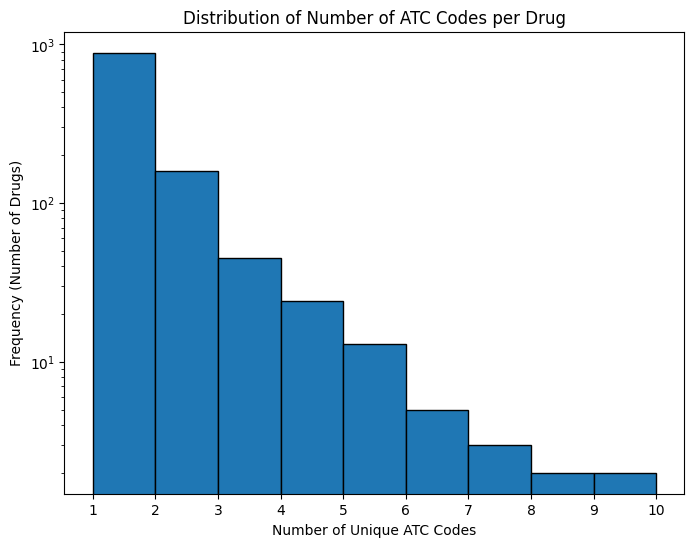

In [11]:
plt.figure(figsize=(8, 6))
plt.hist(atc_counts["atc_count"], bins=range(1, 11), edgecolor="black")
plt.xlabel("Number of Unique ATC Codes")
plt.ylabel("Frequency (Number of Drugs)")
plt.title("Distribution of Number of ATC Codes per Drug")
plt.yscale("log")
plt.xticks(range(1, 11))
plt.show()

In [10]:
drug_era_atc["atc_first_level"] = drug_era_atc["atc_code"].str[0]
atc_first_level_counts = drug_era_atc["atc_first_level"].value_counts()
print(atc_first_level_counts)

atc_first_level
A    223
N    218
D    173
C    158
S    150
R    132
J    120
G    107
L    102
B     72
M     64
P     34
H     32
V     32
Name: count, dtype: int64


In [11]:
drug_era_atc["atc_first_level"] = drug_era_atc["atc_code"].str[0]  # First letter
drug_era_atc["atc_second_level"] = drug_era_atc["atc_code"].str[
    :3
]  # First three characters
atc_grouped = (
    drug_era_atc.groupby(["atc_first_level", "atc_second_level"])
    .size()
    .unstack(fill_value=0)
)

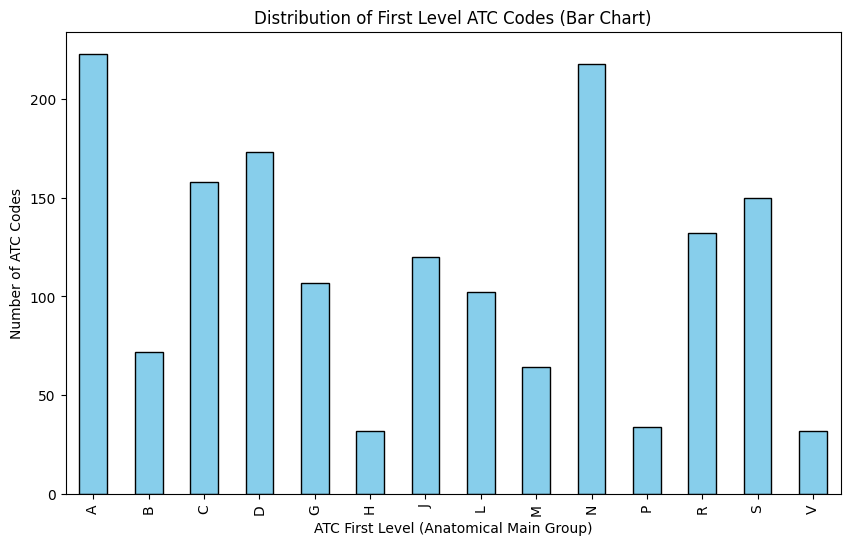

In [12]:
# First Class, Bar Chart
plt.figure(figsize=(10, 6))
atc_first_level_counts.sort_index().plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("ATC First Level (Anatomical Main Group)")
plt.ylabel("Number of ATC Codes")
plt.title("Distribution of First Level ATC Codes (Bar Chart)")
plt.show()

In [43]:
# First Class, Pie Chart
plt.figure(figsize=(20, 20))

# Get labels with both codes and names
pie_labels = [
    f"{code} ({atc_first_level_full_list[code]})"
    for code in atc_first_level_counts.index
]

# Plot the pie chart without the "V" label initially
wedges, texts, autotexts = plt.pie(
    atc_first_level_counts,
    labels=pie_labels,
    autopct="%1.1f%%",
    startangle=90,
    colors=plt.cm.tab20.colors,
    pctdistance=0.85,
    labeldistance=1.05,
    textprops={"fontsize": 15},
)

# Adjust the "V" label manually
for i, label in enumerate(pie_labels):
    if label.startswith("V"):
        texts[i].set_position(
            (-0.05, texts[i].get_position()[1])
        )  # Move the label to the left

plt.title("Distribution of First Level ATC Codes (Pie Chart)", fontsize=20)
plt.tight_layout()
plt.show()

In [44]:
# Second Class, Pie Chart
for first_level in atc_grouped.index:
    second_level_counts = atc_grouped.loc[first_level]

    # Filter out zero counts (second levels that don't exist in the data for this first level)
    second_level_counts = second_level_counts[second_level_counts > 0]

    # Get the name of the first-level ATC from the dictionary
    first_level_name = atc_first_level_full_list[first_level]
    # Plot pie chart for the current First Level ATC
    plt.figure(figsize=(10, 10))
    plt.pie(
        second_level_counts,
        labels=second_level_counts.index,
        autopct="%1.1f%%",
        startangle=90,
        colors=plt.cm.tab20.colors,
        pctdistance=0.85,
    )
    plt.title(
        f"Distribution of Second Level ATC Codes for First Level: {first_level} ({first_level_name})"
    )
    plt.show()

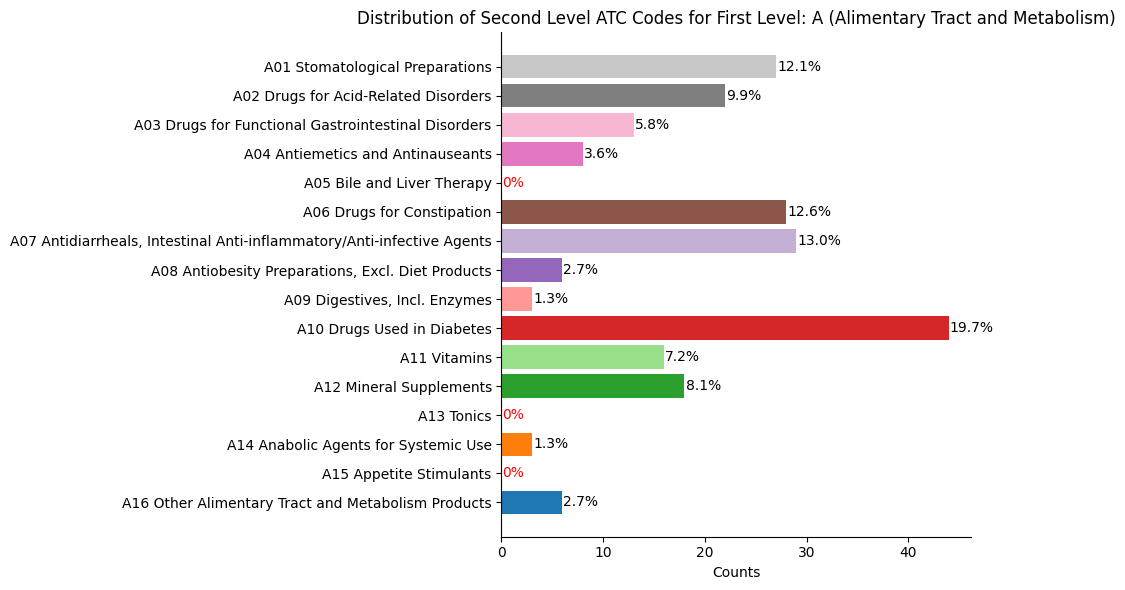

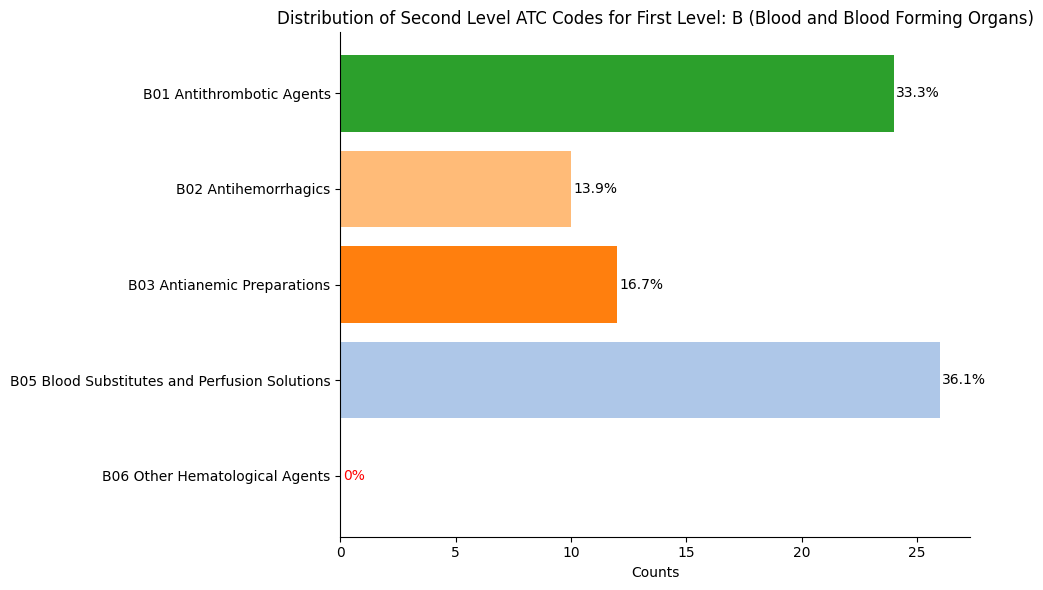

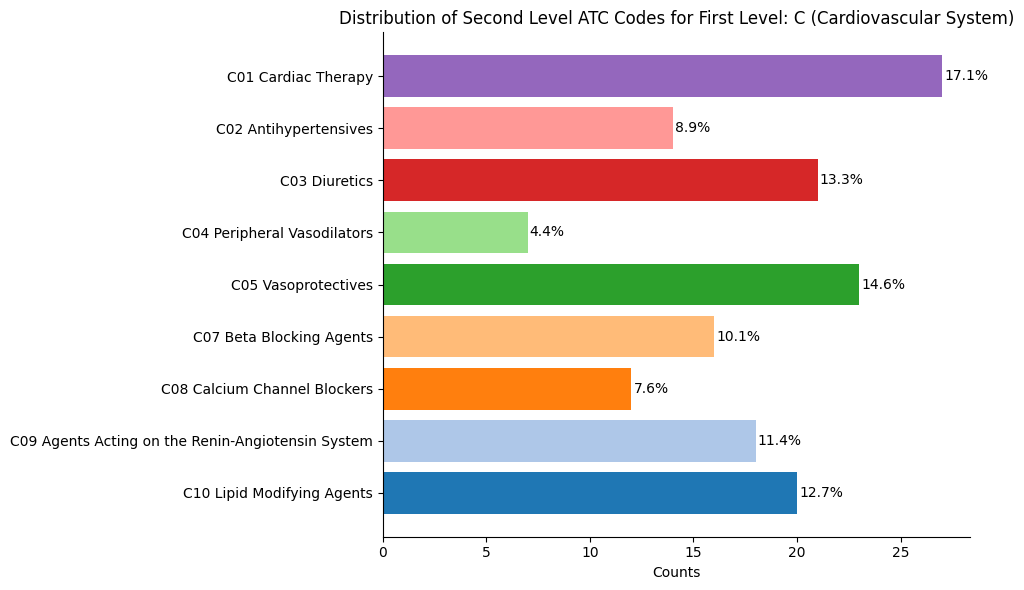

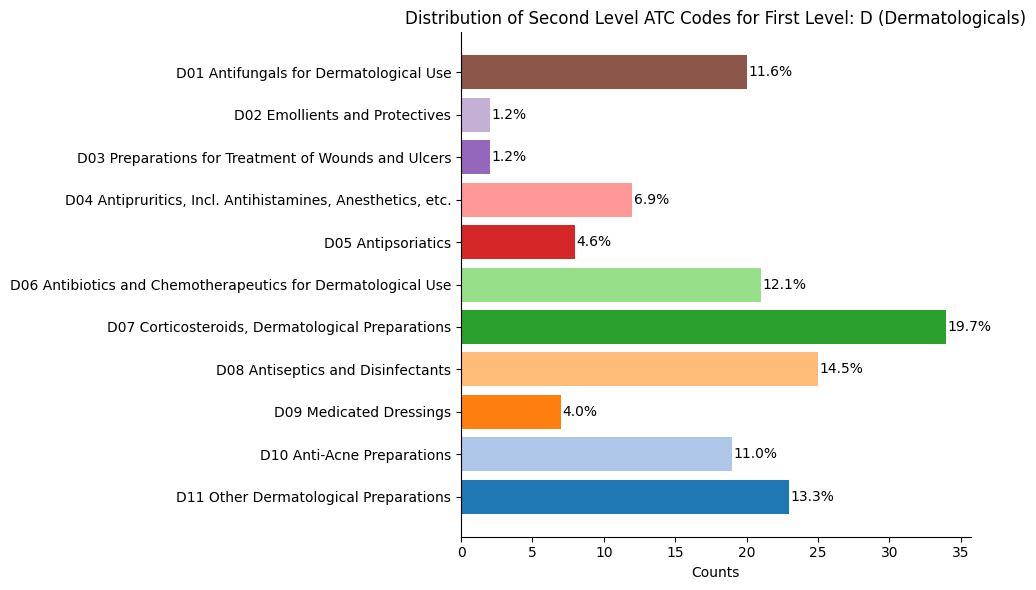

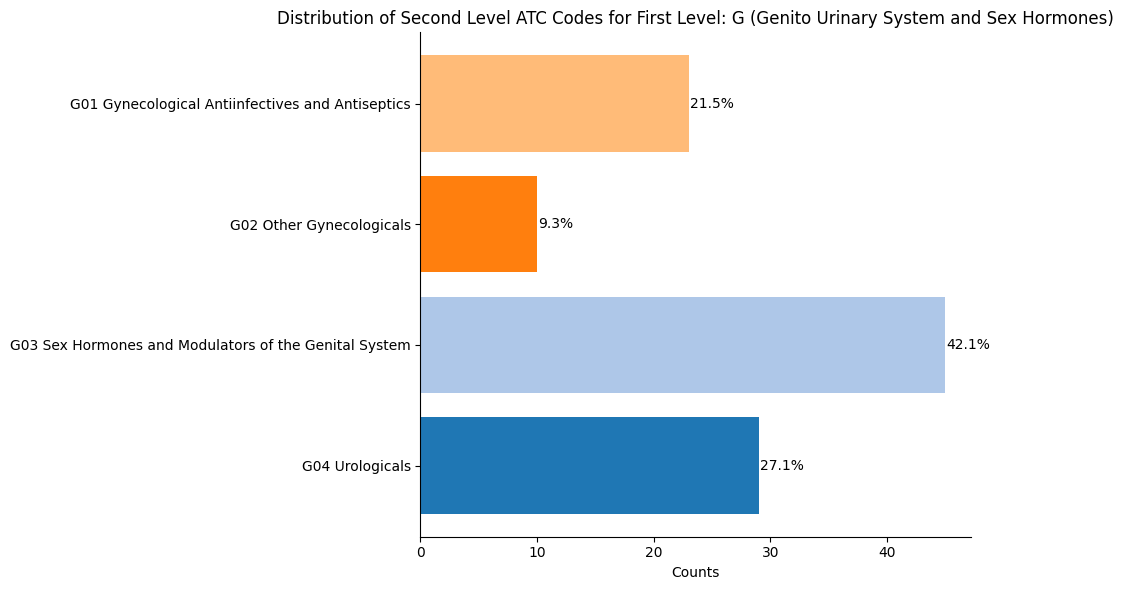

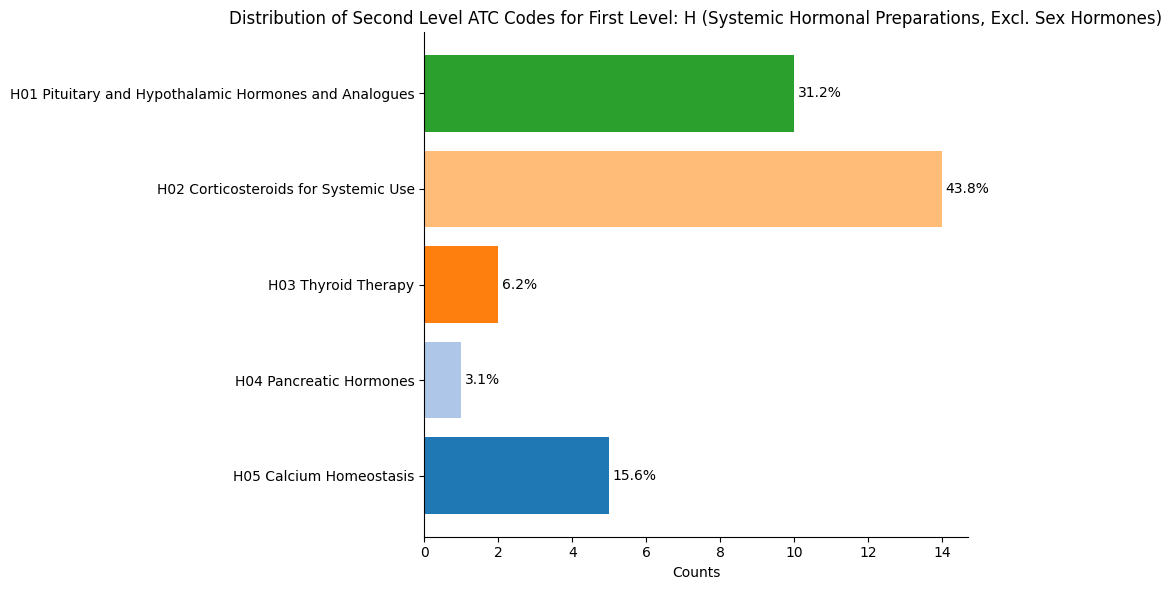

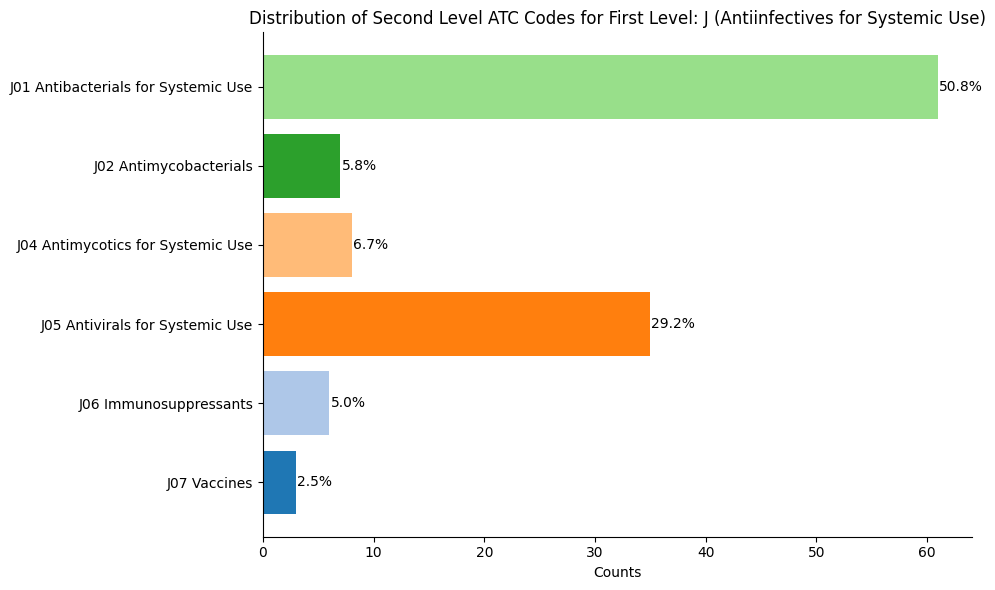

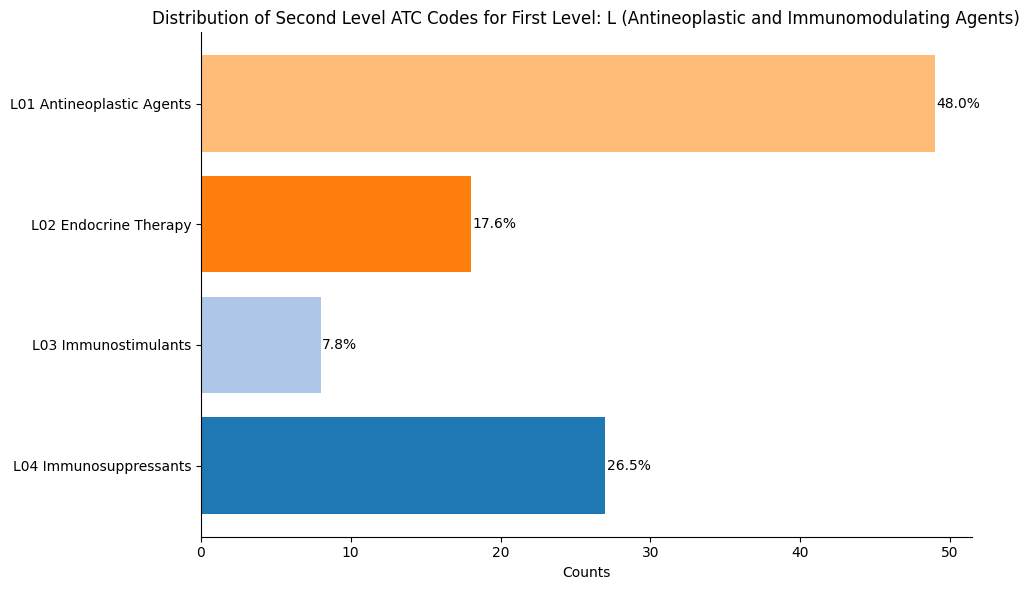

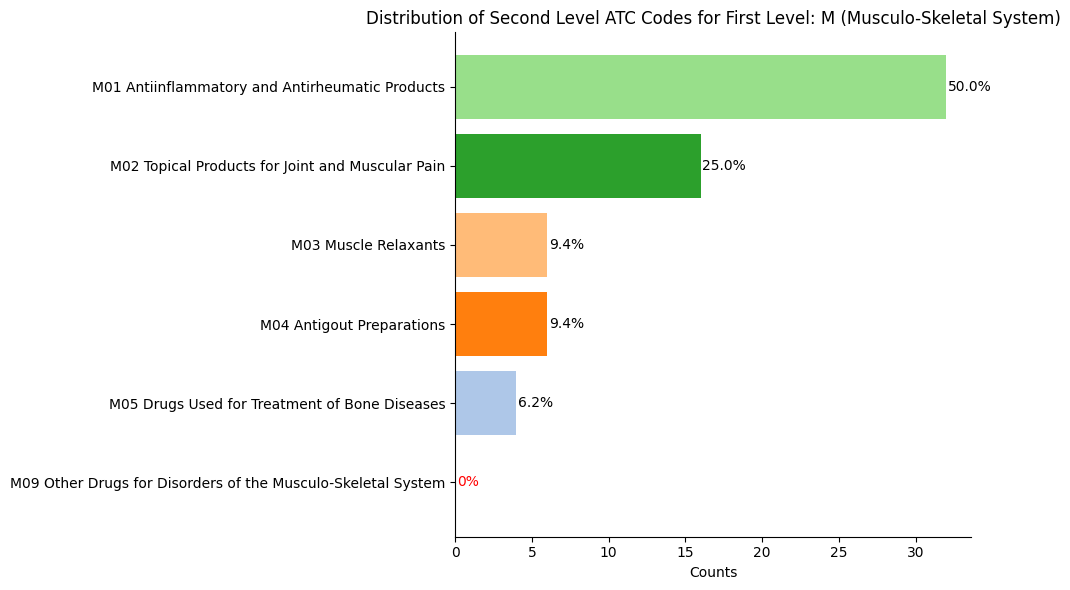

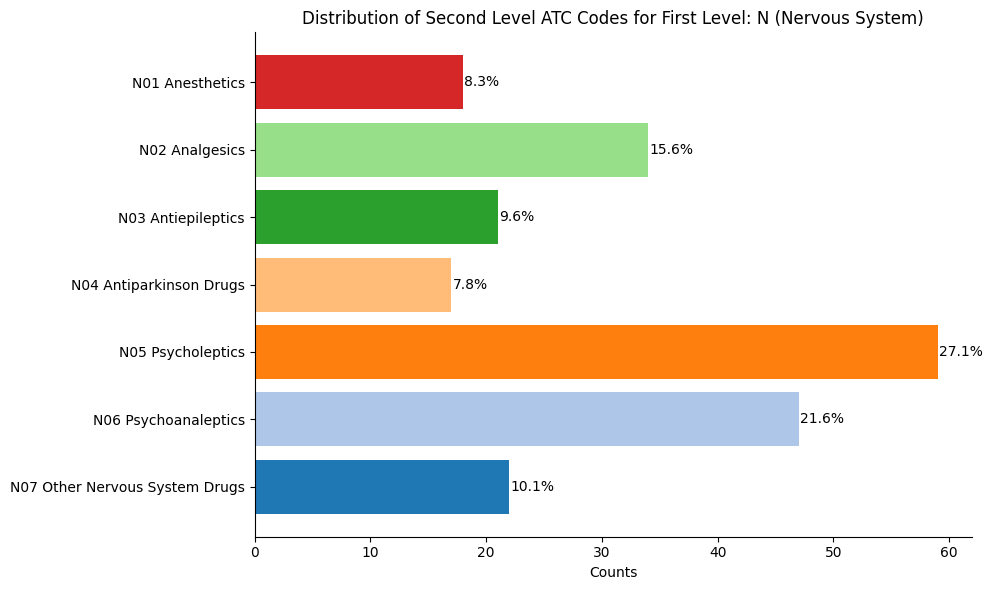

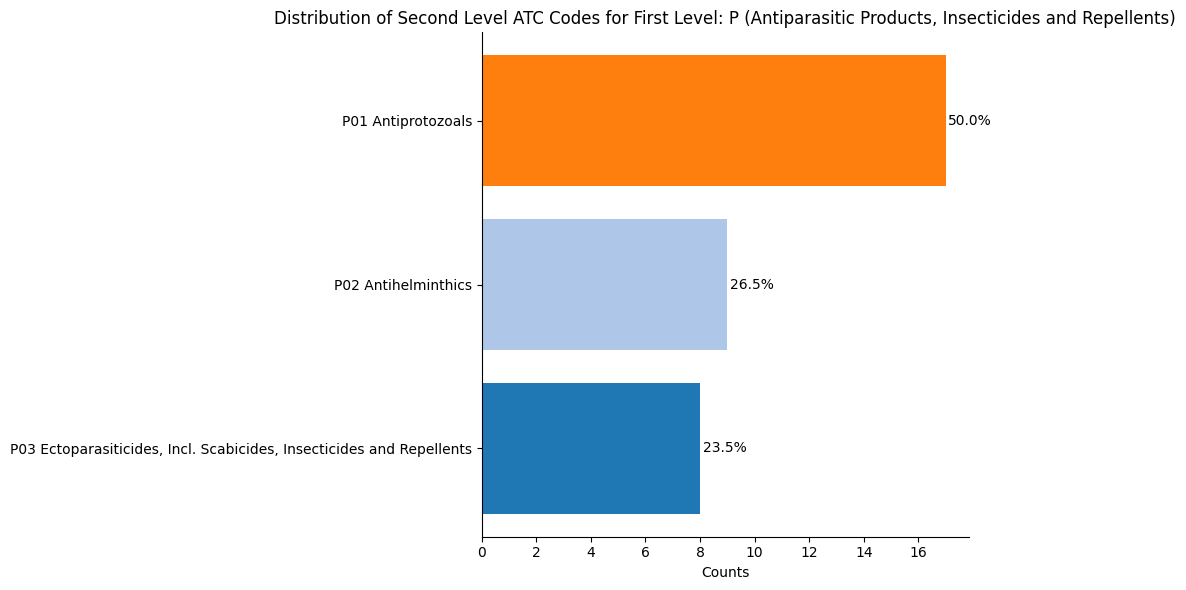

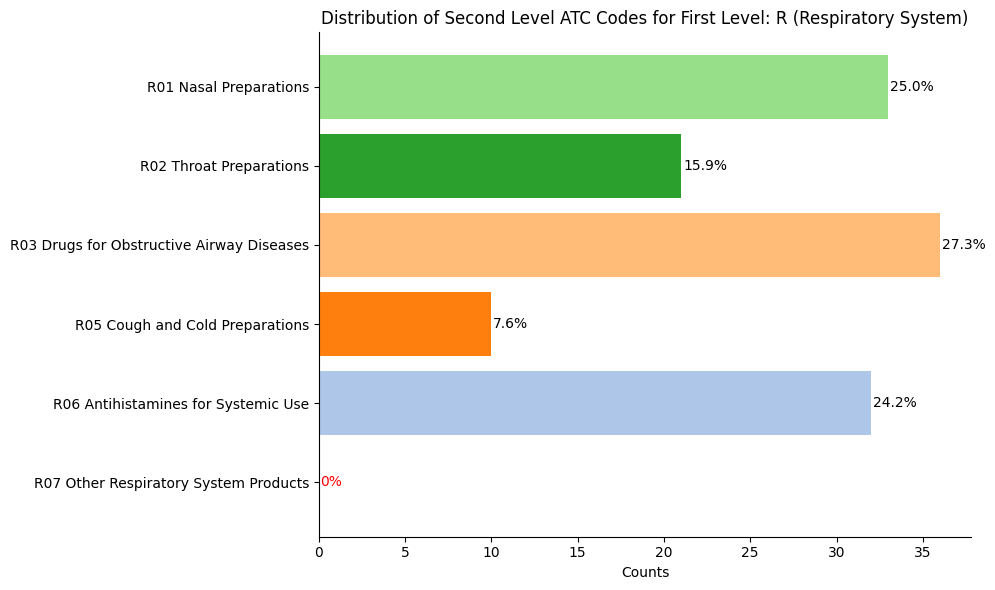

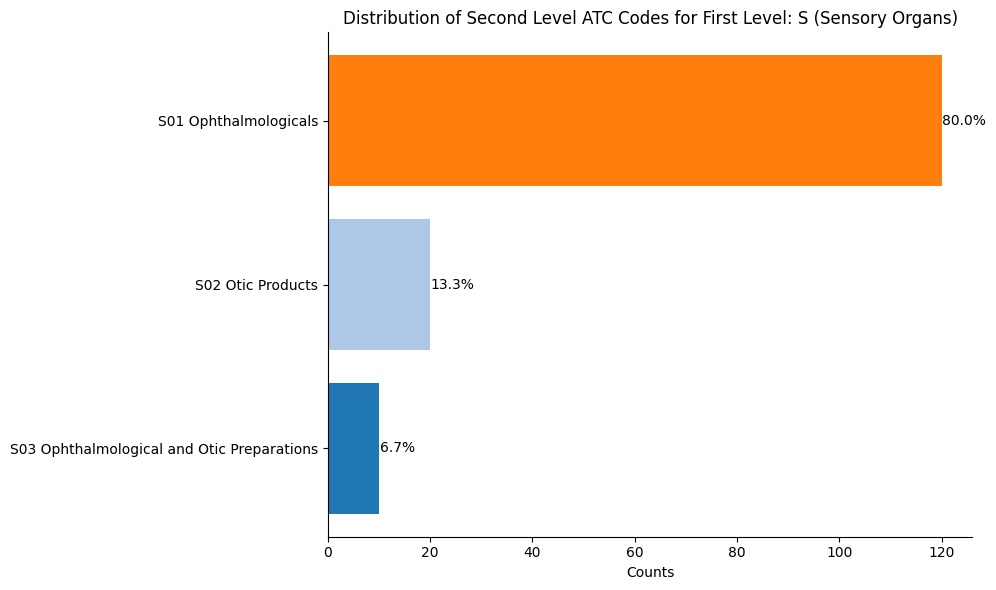

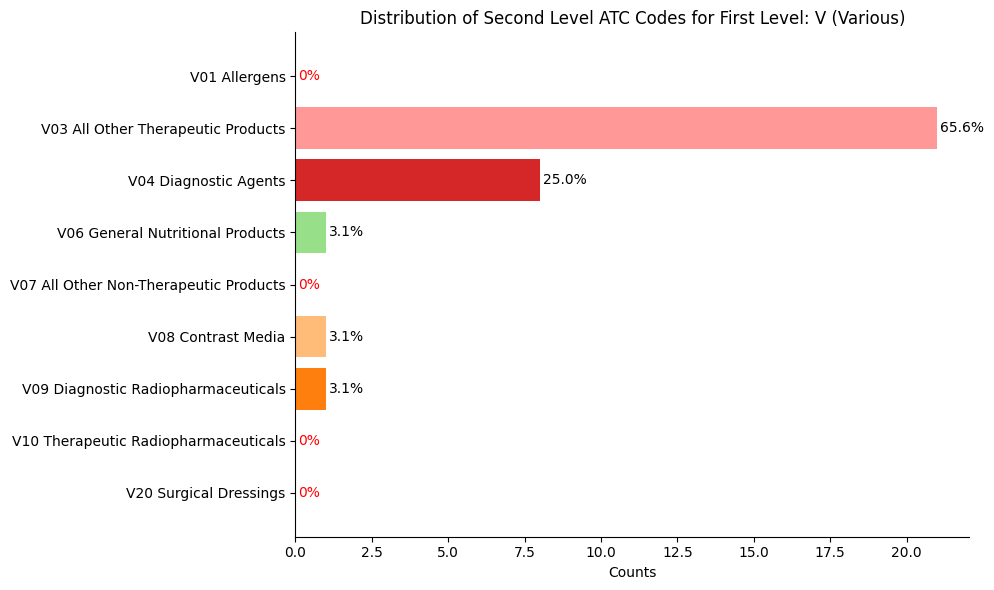

In [56]:
# Second Class, Bar Chart
# Loop through each first-level ATC code in the grouped data
for first_level in atc_grouped.index:
    second_level_counts = atc_grouped.loc[first_level]

    # Get the full second-level ATC codes and names for this first-level category from the dictionary
    second_level_full_list = atc_second_level_full_list[first_level]

    # Reindex to ensure all second-level codes are present, including missing ones (set missing to 0)
    second_level_counts = second_level_counts.reindex(
        second_level_full_list.keys(), fill_value=0
    )

    # Sort the second-level counts in ascending order based on their codes
    second_level_counts = second_level_counts.sort_index(ascending=True)

    # Normalize counts to get percentages
    total = second_level_counts.sum()
    second_level_percentages = (
        (second_level_counts / total) * 100 if total > 0 else second_level_counts
    )

    # Get the name of the first-level ATC from your dictionary
    first_level_name = atc_first_level_full_list.get(first_level, "Unknown")

    # Sort the second-level full list by keys (second-level codes) in ascending order
    sorted_second_level_full_list = dict(sorted(second_level_full_list.items()))

    # Prepare labels that combine the second-level code and its corresponding description
    labels = [f"{code} {desc}" for code, desc in sorted_second_level_full_list.items()]

    # Plot horizontal bar chart for the current First Level ATC with counts on the x-axis
    plt.figure(figsize=(10, 6))
    bars = plt.barh(
        labels[::-1], second_level_counts.values[::-1], color=plt.cm.tab20.colors
    )  # Reverse the labels and values

    # Add percentage labels to each bar
    for bar, value, pct in zip(
        bars, second_level_counts[::-1], second_level_percentages[::-1]
    ):
        if value == 0:
            plt.text(
                bar.get_width() + 0.1,
                bar.get_y() + bar.get_height() / 2,
                "0%",
                va="center",
                color="red",
            )
        else:
            plt.text(
                bar.get_width() + 0.1,
                bar.get_y() + bar.get_height() / 2,
                f"{pct:.1f}%",
                va="center",
                color="black",
            )

    # Add title and labels
    plt.title(
        f"Distribution of Second Level ATC Codes for First Level: {first_level} ({first_level_name})"
    )
    plt.xlabel("Counts")  # X-axis now shows counts
    # plt.ylabel("Second-Level ATC Codes")
    plt.tight_layout()
    plt.gca().spines["right"].set_visible(False)
    plt.gca().spines["top"].set_visible(False)
    plt.show()